In [158]:
inputFile = "1000_20.txt"
resultFile = "D1_1000_20_out.txt"

In [159]:
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import unary_union, nearest_points
from shapely import wkt
import matplotlib.pyplot as plt 
import matplotlib.patches as patches 
import math

def polygon_boundary(polygon):
    x = []
    y = []
    boundary = list(polygon.exterior.coords) 
    for p in boundary:
        x.append(p[0])
        y.append(p[1])
    return x, y


def display_result(inputFile, outputFile): 
    input = open(inputFile, "r")
    temp = input.readline()
    numPoly = int(temp)
    temp = input.readline()
    numRec = int(temp)
    inputRecs = []
    while input:
        temp = input.readline()
        coords = temp.split(' ')
        if len(coords) < 2:
            break
        curr = []
        point = []
        for i in range(len(coords)):
            if coords[i] == '\n':
                continue
            if i%2 == 0:
                point.clear()
                point.append(float(coords[i]))
            else:
                point.append(float(coords[i]))
                curr.append(point[:])
        currPoly = Polygon(curr)
        inputRecs.append(currPoly)
    with open(outputFile) as res:
        result = res.readlines()
    evalPolygons = []
    for line in result:
        coords = line.split(' ')
        curr = []
        point = []
        for i in range(len(coords)):
            if coords[i] == '\n':
                continue
            if i%2 == 0:
                point.clear()
                point.append(float(coords[i]))
            else:
                point.append(float(coords[i]))
                curr.append(point[:])
        if(Polygon(curr).is_valid):
            currPoly = Polygon(curr)
            evalPolygons.append(currPoly)
    plt.figure(figsize=(8, 8))
    plt.axis('equal')
    for rec in inputRecs:
        x, y = polygon_boundary(rec)
        plt.plot(x, y, 'C2')
    for pol in evalPolygons:
        x, y = polygon_boundary(pol)
        plt.plot(x, y, 'C1')
    plt.show()

def evaluate_score(recs, polys, numPolys): 
    if(len(polys) != numPolys):
        print('Wrong polygon number')
        return -1
    area = 0
    for pol in polys:
        area += pol.area
        x, y = polygon_boundary(pol)
        for i in range(0, len(x)-1):
            x_1, y_1 = x[i], y[i]
            x_2, y_2 = x[i+1], y[i+1]
            if x_1 != x_2 and y_1 != y_2:
                print('The polygon', pol, 'is not rectilinear or not in clockwise order')
                return -1
    for rec in recs:
        covered = False
        for pol in polys:
            if(pol.covers(rec)):
                covered = True
                break;
        if(covered):
            continue
        print('The rectangle', rec, 'is not contained by any pol ygons')
        return -1
    return area


In [160]:
input = open(inputFile, "r")
temp = input.readline()
numPoly = int(temp)
temp = input.readline()
numRec = int(temp)
inputRecs = []
while input:
    temp = input.readline()
    coords = temp.split(' ')
    if len(coords) < 2:
        break
    curr = []
    point = []
    for i in range(len(coords)):
            if coords[i] == '\n':
                continue
            if i%2 == 0:
                point.clear()
                point.append(float(coords[i]))
            else:
                point.append(float(coords[i]))
                curr.append(point[:])
    currPoly = Polygon(curr)
    inputRecs.append(currPoly)
#print('Rectangles:')
#for rec in inputRecs:
    #print(rec)

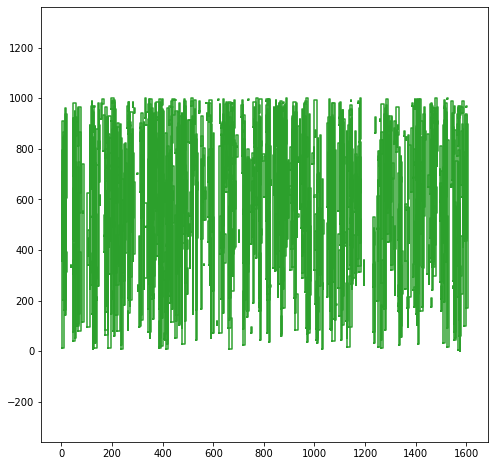

In [161]:
plt.figure(figsize=(8, 8))
plt.axis('equal')
for rec in inputRecs:
    x, y = polygon_boundary(rec)
    plt.plot(x, y, 'C2')

In [162]:
i = 0
j = 0
while i < len(inputRecs):
    j = i+1
    while j < len(inputRecs):
        #print('len :',len(inputRecs))
        #print('i: ', i, 'j: ', j)
        #print('inputRecs1: ',inputRecs[i])
        #print('inputRecs2: ',inputRecs[j])
        #plt.figure(figsize=(8, 8))
        #plt.axis('equal')
        xi, yi = polygon_boundary(inputRecs[i])
        xj, yj = polygon_boundary(inputRecs[j])
        #for rec in inputRecs:
            #x, y = polygon_boundary(rec)
            #print(rec)
            #plt.plot(x, y, 'C3')
        #plt.plot(xi, yi, 'C1')
        #plt.plot(xj, yj, 'C2')
        #print(inputRecs[i].distance(inputRecs[j]))
        if inputRecs[i].distance(inputRecs[j]) == 0:
            uni = inputRecs[i].union(inputRecs[j])
            inputRecs.remove(inputRecs[j])
            inputRecs[i] = uni
            j = j-1
        #plt.figure(figsize=(8, 8))
        #plt.axis('equal')
        #for rec in inputRecs:
            #x, y = polygon_boundary(rec)
            #print(rec)
            #plt.plot(x, y, 'C3')
        j = j+1
    i = i+1

        

In [163]:
for iter in range(numPoly,len(inputRecs)):
    #find most min dist. rect of rect
    dis_min1 = inputRecs[0]
    dis_min2 = inputRecs[1]
    dis_min_val = dis_min1.distance(dis_min2)
    #print('dis_min: ',dis_min)
    #print('dis_min_val: ',dis_min_val)


    for i in range(len(inputRecs)):
        for j in range(i+1,len(inputRecs)):
            #print('inputRecs1: ',inputRecs[i])
            #print('inputRecs2: ',inputRecs[j])
            #print(inputRecs[i].distance(inputRecs[j]))
            if inputRecs[i].distance(inputRecs[j])  < dis_min_val:
                dis_min1 = inputRecs[i]
                dis_min2 = inputRecs[j]
                dis_min_val = dis_min1.distance(dis_min2)

    #print('---------')
    #print('dis_min1: ',dis_min1)
    #print('dis_min2: ',dis_min2)
    #print('dis_min_val: ',dis_min_val)

    pp1, pp2 = nearest_points(dis_min1, dis_min2)
    #print('pp1: ',pp1,'pp2: ',pp2)
    pp1_boundary = list(pp1.coords) 
    pp2_boundary = list(pp2.coords)
    for p in pp1_boundary:
        pp1_x = p[0]
        pp1_y = p[1]
    for p in pp2_boundary:
        pp2_x = p[0]
        pp2_y = p[1]

    if ((pp1_x == pp2_x)|(pp1_y == pp2_y)):
        add = LineString([pp1, pp2])
    else:
        add = LineString([pp1, (pp1_x, pp2_y), pp2])

    add_buffer = add.buffer(1, cap_style = 2, join_style = 2)

    uni = dis_min1.union(add_buffer)
    uni = uni.union(dis_min2)

    xi, yi = polygon_boundary(uni)
    #plt.figure(figsize=(8, 8))
    #plt.axis('equal')
    #for rec in inputRecs:
        #x, y = polygon_boundary(rec)
        #plt.plot(x, y, 'C2')
    #plt.plot(xi, yi, 'C1')


    #remove merge item
    #print(len(inputRecs))
    #for rec in inputRecs:
        #print(rec)
    inputRecs.remove(dis_min1)
    inputRecs.remove(dis_min2)
    #print(len(inputRecs))
    #for rec in inputRecs:
        #print(rec)
    #add new merge item
    inputRecs.append(uni)
    #print(len(inputRecs))
    #for rec in inputRecs:
        #print(rec)

    #plt.figure(figsize=(8, 8))
    #plt.axis('equal')
    #for rec in inputRecs:
        #x, y = polygon_boundary(rec)
        #plt.plot(x, y, 'C2')


In [164]:
f = open(resultFile, 'w')
for rec in inputRecs:
    boundary = list(rec.exterior.coords) 
    for element in range(len(boundary)-1):
        #print(boundary[element])
        f.writelines(str(boundary[element][0])+' '+str(boundary[element][1])+' ')
    f.writelines('\n')

f.close()


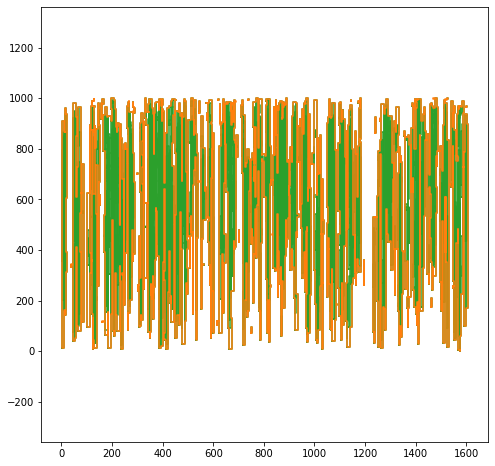

In [165]:
display_result(inputFile, resultFile)

In [166]:
with open(resultFile) as res:
    result = res.readlines()
evalPolygons = []
for line in result:
    coords = line.split(' ')
    curr = []
    point = []
    for i in range(len(coords)):
        if coords[i] == '\n':
            continue
        if i%2 == 0:
            point.clear()
            point.append(float(coords[i]))
        else:
            point.append(float(coords[i]))
            curr.append(point[:])
    if(Polygon(curr).is_valid):
        currPoly = Polygon(curr)
        evalPolygons.append(currPoly)
print('Polygons:')
for pol in evalPolygons:
    print(pol)
print('Result:')
score = evaluate_score(inputRecs, evalPolygons, numPoly) 
print('Score =', score)

Polygons:
POLYGON ((1241 862, 1241 926, 1245 926, 1245 862, 1241 862))
POLYGON ((1461 173, 1461 211, 1464 211, 1464 173, 1461 173))
POLYGON ((1144 987, 1144 991, 1146 991, 1146 987, 1144 987))
POLYGON ((12 868, 12 962, 18 962, 18 936, 22 936, 22 606, 19 606, 19 390, 20 390, 20 311, 18 311, 18 141, 12 141, 12 164, 11 164, 11 12, 2 12, 2 358, 1 358, 1 543, 2 543, 2 793, 2 910, 9 910, 9 868, 12 868))
POLYGON ((544 942, 544 987, 548 987, 548 942, 544 942))
POLYGON ((1600 965, 1600 969, 1603 969, 1603 965, 1600 965))
POLYGON ((738 993, 738 995, 740 995, 740 993, 738 993))
POLYGON ((750 73, 750 97, 753 97, 753 73, 750 73))
POLYGON ((300 702, 300 703, 301 703, 301 702, 300 702))
POLYGON ((618 994, 618 995, 621 995, 621 994, 618 994))
POLYGON ((1194 262, 1194 359, 1195 359, 1195 262, 1194 262))
POLYGON ((702 431, 702 478, 703 478, 703 431, 702 431))
POLYGON ((37 331, 37 342, 39 342, 39 343, 46 343, 46 645, 46 923, 47 923, 47 979, 58 979, 58 925, 63 925, 63 905, 63 904, 63 851, 58 851, 58 694, 